# 8- MÉTRICAS

 La rápida expansión de NILM y el desarrollo de diferentes algoritmos, han hecho que sea esencial proporcionar una evaluación de rendimiento mediante el uso de métricas de desempeño. Las métricas de evaluación, comparan los resultados de la desagregaciónn (predicciones) de los modelos entrenados con los datos del set de validación (mediciones reales de cada proceso). NILMTK cuenta con el cálculo de métricas de evaluación mediante el uso del MeterGroup para la validación de los resultados mediante el set de validación 
 Vamos ahora analizar en nuestro dataset diferentes metricas como son FEAC,F1, EAE ,MNEAP y RMSE  que  resumimos a continuacion en el siguinte cuadro:

![metricas](metricas.jpg)

En primer lugar cargamos las ibrerías y realizamos otros ajustes:

In [100]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import warnings
warnings. filterwarnings("ignore")
plt.style.use('bmh')

from nilmtk import TimeFrame, MeterGroup, HDFDataStore, DataSet
from nilmtk.metrics import fraction_energy_assigned_correctly, mean_normalized_error_power
from nilmtk.metrics import rms_error_power, f1_score, error_in_assigned_energy

data_dir='./data/'

### Métricas individuales del modelo

In [101]:
#Librerías
from nilmtk.metrics import f1_score
from nilmtk.metrics import error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power
from nilmtk.metrics import rms_error_power
from nilmtk.metrics import fraction_energy_assigned_correctly

In [102]:


labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})


 

#Set para validación
valid = DataSet('dsual.h5')
valid.set_window(start="2022-11-07 11:25:00", end="2022-11-07 11:35:00")
valid_elec = valid.buildings[1].elec

print('Medidor de cabecera para desagregación:')
valid_Main = valid_elec.mains()
print(valid_Main)

print('\nDispositivos para validación de entrenamiento:')
valid_Devices = valid_elec.select(instance=[2,3,4,5,6,7,8,9,10,11])
print(valid_Devices)



#Datos de Dispositivos: predicción
# Se carga los resultados del mejor modelo
#dataset=DataSet(data_dir+'NILM/Results/CO_30s_first_pred.h5')
#predictions=dataset.buildings[1].elec.submeters()   





index = list(labels['Meters'][1:11])
met = []
e = []
#Datos de Dispositivos: predicción
#dataset=DataSet(data_dir+'NILM/Results/FHMM_30s_first_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.880	0.000	0.000	0.182	0.000	0.000	0.364	0.118	0.875	0.105
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.760	1.483	-1.095	1.793	39.008	57.445	0.803	2.451	0.845	1.510
#RMSE	685.178	1052.231	32.154	577.504	544.419	982.996	931.299	29.877	136.595	59.534



dataset=DataSet(data_dir+'NILM/Results/CO_10s_mean_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.580	0.545	0.000	0.125	0.143	0.000	0.698	0.356	0.635	0.683
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.776	1.039	-1.107	1.815	23.836	61.997	0.689	1.457	0.946	0.878


#dataset=DataSet(data_dir+'NILM/Results/CO_10s_first_pred.h5')
#Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.250	0.455	0.000	0.256	0.093	0.000	0.474	0.255	0.830	0.617
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.909	0.704	-1.107	0.734	43.245	32.660	0.711	2.358	4.066	1.117
#RMSE	614.543	682.472	32.937	545.882	565.616	729.521	872.801	28.726	334.935	43.085

#dataset=DataSet(data_dir+'NILM/Results/CO_10s_median_pred.h5')  #mejores resultados
#Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.292	0.554	0.000	0.769	0.278	0.000	0.571	0.146	0.553	0.787
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.673	0.830	-1.107	0.471	28.634	19.708	0.634	1.789	0.669	0.720
#RMSE	535.969	771.306	32.937	428.442	432.097	556.453	727.360	23.166	54.668	32.790


#dataset=DataSet(data_dir+'NILM/Results/CO_30s_first_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.222	0.400	0.000	0.000	0.000	0.000	0.800	0.167	0.615	0.741
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	0.601	0.981	-1.100	1.002	28.779	58.603	0.409	1.898	3.284	0.845
#RMSE	442.110	851.935	32.819	620.785	465.284	989.242	636.407	25.052	290.866	33.909


#dataset=DataSet(data_dir+'NILM/Results/FHMM_60s_mean_pred.h5')
#	Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.667	0.571	0.000	0.182	0.000	0.000	0.333	0.286	0.462	0.571
#EAE	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.077	0.928	-1.080	1.675	17.418	63.829	0.784	1.397	0.655	0.998
#RMSE	586.778	687.973	30.631	563.603	180.728	423.367	872.954	20.273	52.041	34.697



#dataset=DataSet(data_dir+'NILM/Results/FHMM_10min_mean_pred.h5')
#Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000	0.000
#EAE	0.026	0.027	0.000	0.016	0.035	0.061	0.117	0.002	0.005	0.004
#MNEAP	0.273	0.690	-0.968	0.284	15.338	54.097	1.077	0.353	0.018	1.585
#RMSE	187.409	592.887	30.635	129.910	205.596	362.303	481.275	5.479	1.103	17.167




#dataset=DataSet(data_dir+'NILM/Results/CO_10min_mean_pred.h5')
#Electric furnace	Microwave	Television	Kettle	Vacuum cleaner	Electric space heater	Electric shower heater	Fan	Fridge	Freezer
#F1	0.000	0.000	0.000	0.00	0.000	0.000	0.000	0.000	0.000	0.000
#EAE	0.000	0.000	0.000	0.00	0.000	0.000	0.000	0.000	0.000	0.000
#MNEAP	1.000	1.000	-1.000	1.00	1.000	1.000	1.000	1.000	1.000	1.000
#RMSE	686.409	858.887	31.635	456.91	13.404	6.697	446.725	15.521	60.103	10.833




predictions=dataset.buildings[1].elec.submeters()      

#Metricas
f1 = {}; eae = {}; feac = {}; mneap = {}; rmse = {};

f1['F1'] = f1_score(predictions, valid_Devices)

EAE = error_in_assigned_energy(predictions, valid_Devices)

for x in range(len(EAE)): e.append(EAE.iloc[x][0])
eae['EAE'] = e
#da error esta medida AttributeError: 'tuple' object has no attribute 'instance'
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
#feac['FEAC'] = np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                      pd.DataFrame(f1),
                      pd.DataFrame(eae, index=valid_Devices.instance()),
                      pd.DataFrame(mneap),
                      pd.DataFrame(rmse)],
                     axis=1).set_index(pd.Index(index)))

dataset.store.close()       
print('\n\nDone!')
metrics=met[0].transpose().round(3)
metrics

Medidor de cabecera para desagregación:
ElecMeter(instance=1, building=1, dataset='DSUAL', site_meter, appliances=[])

Dispositivos para validación de entrenamiento:
MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])
  ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])
  ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])
  ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])
  ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])
  ElecMeter(instance=8, building=1, dataset='DSUAL', appliances=[Appliance(type='electric shower heater', instance=1)])
  ElecMeter(instance=9, buildin

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
F1,0.580,0.545,0.000,0.125,0.143,0.000,0.698,0.356,0.635,0.683
EAE,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
MNEAP,0.776,1.039,-1.107,1.815,23.836,61.997,0.689,1.457,0.946,0.878
RMSE,637.662,804.747,32.937,691.208,361.919,848.608,722.928,19.559,70.869,35.198


Carga de datos de predicciones y GT en memoria

In [103]:
gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=30, resample_kwargs={'how':'first'})




labels = pd.DataFrame({'Instances': list(range(1,12)),
                       'Meters': ['Main', 'Electric furnace', 'Microwave','Television','Kettle','Vacuum cleaner','Electric space heater','Electric shower heater','Fan','Fridge','Freezer']})



Meters={}
for x in range(len(labels)): Meters[valid_elec[x+1]]=labels['Meters'][x]
    

    
    
#resultados de predicción modelo CO 10s

CO_30s_first=DataSet(data_dir+'NILM/Results/CO_10s_median_pred.h5')
elec_CO_30s_first=CO_30s_first.buildings[1].elec

#resultados de predicción modelo FHMM 10s

FHMM_30s_first=DataSet(data_dir+'NILM/Results/FHMM_10s_median_pred.h5')
elec_FHMM_30s_first= FHMM_30s_first.buildings[1].elec    
    
    

gt.columns=list(Meters.values())
pred_CO=elec_CO_30s_first.dataframe_of_meters(ac_type='active')

pred_CO.columns=[list(Meters.values())[0]]+list(Meters.values())[1:11]

pred_FHMM=elec_FHMM_30s_first.dataframe_of_meters(ac_type='active')

pred_FHMM.columns=[list(Meters.values())[0]]+list(Meters.values())[1:11]

### Análisis particular del cálculo de cada métrica

Metrica FEAC ( da problema con AttributeError: 'tuple' object has no attribute 'instance')

In [104]:
#Carga de datos de predicciones y GT en memoria
#gt=valid_elec.dataframe_of_meters(ac_type='active', sample_period=60, resample_kwargs={'how':'first'})
#gt.columns=list(Meters.values())

In [105]:
#predictions_Devices=elec_CO_60s_first.submeters()

#frac_1 = valid_Devices.fraction_per_meter()
#frac_2 = predictions_Devices.fraction_per_meter()
#fig, (ax1, ax2) = plt.subplots(1, 2 ,gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

#frac_1.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',labels=list(Meters.values())[1:6], figsize=(8,8), ax=ax1,   colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan'])
#frac_2.plot(autopct=lambda p:'{:.0f}%'.format(p), kind='pie',  labels=list(Meters.values())[1:6], figsize=(8,8), ax=ax2,  colors=['tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']) 

#ax1.set(ylabel="")
#ax1.set(xlabel="GT")
#ax2.set(ylabel="")
#ax2.set(xlabel="Predictions")
#plt.savefig('./data/images/5.4_FEAC_CO_60s.svg', bbox_inches='tight', transparent=True)
#pass

## Métrica F1

Esta métrica mide la precisión o asertividad del modelo entrenado mediante el cálculo de la media armónica utilizando las métricas Precision y Recall. Estas métricas son calculadas internamente por NILMTK mediante la matriz de confusión, vease la ecuación de la figura siguiente.

![metricas](metricas.jpg)

Precision se entiende como la fracción de cortes de tiempo en los que se predijo correctamente que un proceso estaba activo, pero realmente se encontraba apagado. Por lo contrario, Recall hace referencia a la fracción de cortes de tiempo en los que se predijo correctamente que el dispositivo estaba encendido y realmente se encontraba encendido .

In [106]:
pd.DataFrame(metrics.loc['F1']).transpose()*100

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
F1,58.0,54.5,0.0,12.5,14.3,0.0,69.8,35.6,63.5,68.3


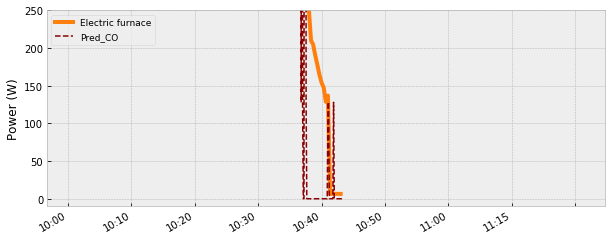

In [107]:
rcParams['figure.figsize'] = (10, 4)

t0 = '2022-11-07 10:25:00+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:00+01:00' #tiempo final

fig, ax1 = plt.subplots();
ax1=gt['Electric furnace'].plot(lw=4, c='tab:orange')
pred_CO['Electric furnace'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric furnace','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()
ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')

#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))


plt.savefig('./data/images/5.5_F1_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

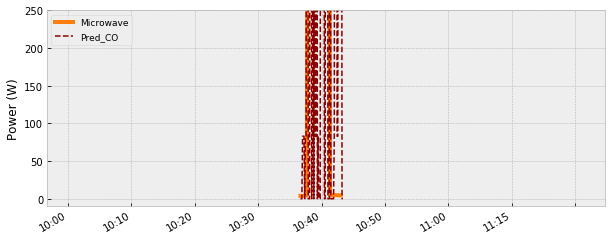

In [108]:
rcParams['figure.figsize'] = (10, 4)

t0 = '2022-11-07 10:25:00+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:00+01:00' #tiempo final

fig, ax1 = plt.subplots();
ax1=gt['Microwave'].plot(lw=4, c='tab:orange')
pred_CO['Microwave'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Microwave','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,250)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()
ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

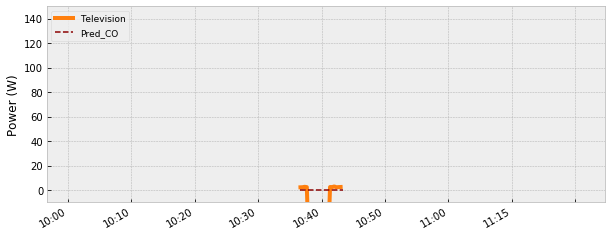

In [109]:
rcParams['figure.figsize'] = (10, 4)

t0 = '2022-11-07 10:25:00+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:00+01:00' #tiempo final

fig, ax1 = plt.subplots();
ax1=gt['Television'].plot(lw=4, c='tab:orange')
pred_CO['Television'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Television','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,150)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  
ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

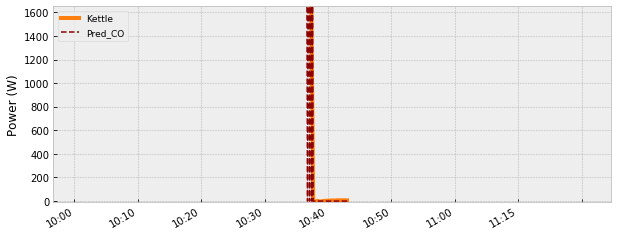

In [110]:
rcParams['figure.figsize'] = (10, 4)


t0 = '2022-11-07 10:25:00+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:00+01:00' #tiempo final


fig, ax1 = plt.subplots();
ax1=gt['Kettle'].plot(lw=4, c='tab:orange')
pred_CO['Kettle'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Kettle','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,1650)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

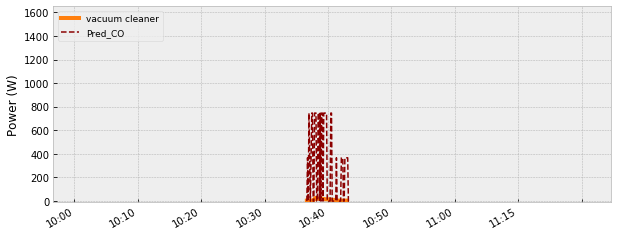

In [111]:
rcParams['figure.figsize'] = (10, 4)


t0 = '2022-11-07 10:25:00+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:00+01:00' #tiempo final

fig, ax1 = plt.subplots();
ax1=gt['Vacuum cleaner'].plot(lw=4, c='tab:orange')
pred_CO['Vacuum cleaner'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['vacuum cleaner','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,1650)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

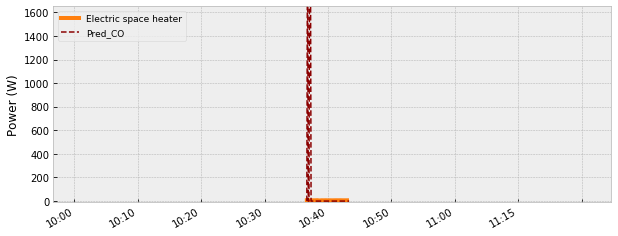

In [112]:
rcParams['figure.figsize'] = (10, 4)


t0 = '2022-11-07 10:25:00+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:00+01:00' #tiempo final


fig, ax1 = plt.subplots();
ax1=gt['Electric space heater'].plot(lw=4, c='tab:orange')
pred_CO['Electric space heater'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric space heater','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,1650)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

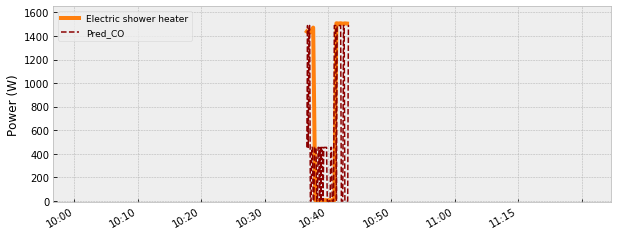

In [113]:
rcParams['figure.figsize'] = (10, 4)


t0 = '2022-11-07 10:25:00+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:00+01:00' #tiempo final


fig, ax1 = plt.subplots();
ax1=gt['Electric shower heater'].plot(lw=4, c='tab:orange')
pred_CO['Electric shower heater'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Electric shower heater','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,1650)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

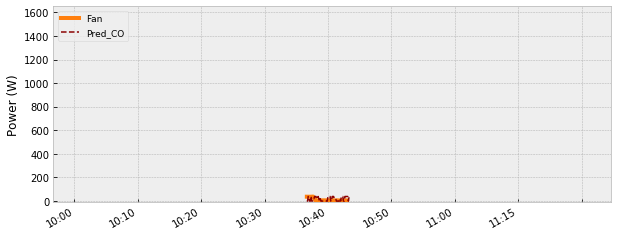

In [114]:
rcParams['figure.figsize'] = (10, 4)


t0 = '2022-11-07 10:25:00+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:00+01:00' #tiempo final


fig, ax1 = plt.subplots();
ax1=gt['Fan'].plot(lw=4, c='tab:orange')
pred_CO['Fan'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Fan','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,1650)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

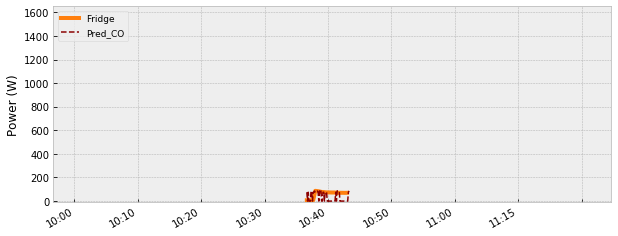

In [115]:
rcParams['figure.figsize'] = (10, 4)


t0 = '2022-11-07 10:25:00+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:00+01:00' #tiempo final


fig, ax1 = plt.subplots();
ax1=gt['Fridge'].plot(lw=4, c='tab:orange')
pred_CO['Fridge'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Fridge','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,1650)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

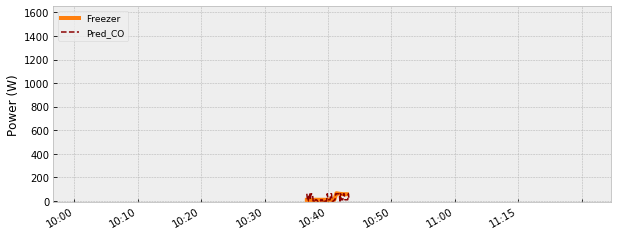

In [116]:
rcParams['figure.figsize'] = (10, 4)


t0 = '2022-11-07 10:25:00+01:00' #tiempo inicial
t1 = '2022-11-07 12:37:00+01:00' #tiempo final


fig, ax1 = plt.subplots();
ax1=gt['Freezer'].plot(lw=4, c='tab:orange')
pred_CO['Freezer'].plot(ax=ax1, c='darkred', lw=1.5, ls='--')
ax1.legend(labels=['Freezer','Pred_CO'], fontsize=9, loc='upper left', ncol=1)
ax1.set_ylim(-10,1650)
ax1.set_xlim(t0,t1)
ax1.minorticks_off()

ax1.set_xticklabels(labels=['10:00','10:10','10:20','10:30','10:40','10:50','11:00','11:15'] , horizontalalignment ='right')  

ax1.set_ylabel('Power (W)')
#ax1.annotate('TP', xy=(250, 188), xycoords='figure points', xytext=(285, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('TN', xy=(320, 38), xycoords='figure points', xytext=(400, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FN', xy=(300, 38), xycoords='figure points', xytext=(530, 70), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
#ax1.annotate('FP', xy=(187, 188), xycoords='figure points', xytext=(220, 210), fontweight='bold',
#             arrowprops=dict(facecolor='red', width=3, headwidth=10))
plt.savefig('./data/images/5.5_F1_CO_60s.svg', bbox_inches='tight', transparent=True)
pass

## Métrica EAE

La ecuación de la figura representa la diferencia entre la energía total asignada yˆt(n) energía total consumida yt(n) por el proceso n de la industria en kWh 

![metricas](metricas.jpg)

In [117]:
round(pd.DataFrame(metrics.loc['EAE']).transpose(),2)

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
EAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
predictions_Devices=elec_CO_30s_first.submeters()
e1=predictions_Devices[5].total_energy()[0]
e2=valid_Devices[10].total_energy()[0]
eae=round(abs(e1-e2),2)

pd.DataFrame([e1,e2,eae], columns=['kWh'], index=['Energy_pred','Energy_GT','EAE'])

,kWh
Energy_pred,0.039018
Energy_GT,0.011013
EAE,0.030000


## Métrica MNEAP

Este indicador que representa la ecuacion de la imagen  consta de la diferencia entre la potencia asignada yˆt(n) y la potencia real yt(n) de cada proceso de la industria, por cada intervalo de tiempo t. Después de sumar todas las diferencias de potencia, el resultado es normalizado por el consumo total de la energía del proceso 

![metricas](metricas.jpg)

In [119]:
round(pd.DataFrame(metrics.loc['MNEAP']).transpose(),2)

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
MNEAP,0.78,1.04,-1.11,1.82,23.84,62.0,0.69,1.46,0.95,0.88


In [120]:
## no ejecutar

In [ ]:
rcParams['figure.figsize'] = (10, 3)
fig, ax1 = plt.subplots();

#umbrales de potencia
a1=[20,1250]

gt['Electric furnace'][a1[0]:a1[1]].plot(ax=ax1, lw=2, c='tab:purple', marker="D")
pred_CO['Electric furnace'][a1[0]:a1[1]].plot(ax=ax1, c='darkred', lw=1, ls='--', marker="D")

ax1.minorticks_off()
ax1.set_ylabel('Power (W)')
ax1.legend(labels=['GT Electric furnace','Pred_CO'], fontsize=9, ncol=1)

err= abs(round((gt['Electric furnace'][a1[0]:a1[1]]-pred_CO['Electric furnace'][a1[0]:a1[1]])[1:6],1))

aux=40
i=0
for e in err:
    ax1.annotate((str(err[i])+'W'), xy=(aux, 140+(abs(err[i]))*0.2), xycoords='axes points', size=10)
    aux=aux+63
    i=i+1


ax1.set_xticklabels(labels=['10:00','10:30','11:00','11:30','12:00','12:30','13:00','13:30','14:00',''])   
#plt.savefig('./data/images/5.6_MNEAP_CO_30s.svg', bbox_inches='tight', transparent=True)
pass

## Métrica RMSE

Esta métrica de la ecuación de la figura es muy utilizada en la comparaciónn de diversos conjuntos de datos, consiste en el error cuadrático medio de la diferencia entre la potencia asignada yˆt(n) y la potencia real yt(n) del proceso de los applicativos , en cada intervalo de tiempo t .

![metricas](metricas.jpg)

In [121]:
round(pd.DataFrame(metrics.loc['RMSE']).transpose(),1)

,Electric furnace,Microwave,Television,Kettle,Vacuum cleaner,Electric space heater,Electric shower heater,Fan,Fridge,Freezer
RMSE,637.7,804.7,32.9,691.2,361.9,848.6,722.9,19.6,70.9,35.2


## Resultados de todos los modelos

In [122]:
from nilmtk.metrics import fraction_energy_assigned_correctly, f1_score, error_in_assigned_energy
from nilmtk.metrics import mean_normalized_error_power, rms_error_power 
periods = { '10s':10, '30s':30, '60s':60, '5min':60*5, '10min':60*10}

dir_predictions = data_dir +'NILM/Results/'
m = {}
classifiers = ['CO', 'FHMM']
methods = ['first', 'mean', 'median']
index = list(labels['Meters'][1:12])

for p_name, sp in periods.items():
    met = []
    for method in methods:
        for clf_name in classifiers:
            print('\nCalculando Metricas: '+ clf_name + '_' + p_name + '_' + method)  
           
            #Datos de Dispositivos: predicción
            input_dir = dir_predictions + clf_name + '_' + p_name + '_' + method +'_pred.h5'
            dataset = DataSet(input_dir)
            predictions=dataset.buildings[1].elec.submeters()       
            
            #Metricas
            f1 = {}; eae = {}; feac = {}; mneap = {}; rmse = {}; e=[];  
            F1 = f1_score(predictions, valid_Devices)
            f1['F1'] = F1*100
            EAE = error_in_assigned_energy(predictions, valid_Devices)
            
            for x in range(len(EAE)): e.append(EAE.iloc[x][0])
            eae['EAE'] = e
            #da error para FEAC
            #feac['FEAC'] = 100*np.ones(6)*(fraction_energy_assigned_correctly(predictions, valid_Devices))
            mneap['MNEAP'] = mean_normalized_error_power(predictions, valid_Devices)
            rmse['RMSE'] = rms_error_power(predictions, valid_Devices)
            met.append(pd.concat([pd.DataFrame(feac, index=valid_Devices.instance()),
                                  pd.DataFrame(f1),
                                  pd.DataFrame(eae, index=valid_Devices.instance()),
                                  pd.DataFrame(mneap),
                                  pd.DataFrame(rmse)],
                                 axis=1).set_index(pd.Index(index)))
            dataset.store.close()        
    m[p_name] = met

##Guardamos resultados
f = open(data_dir +'NILM/metrics.txt',"w")
f.write( str(m) )
f.close()
print('\n\nDone!')


Calculando Metricas: CO_10s_first

Calculando Metricas: FHMM_10s_first

Calculando Metricas: CO_10s_mean

Calculando Metricas: FHMM_10s_mean

Calculando Metricas: CO_10s_median

Calculando Metricas: FHMM_10s_median

Calculando Metricas: CO_30s_first

Calculando Metricas: FHMM_30s_first

Calculando Metricas: CO_30s_mean

Calculando Metricas: FHMM_30s_mean

Calculando Metricas: CO_30s_median

Calculando Metricas: FHMM_30s_median

Calculando Metricas: CO_60s_first

Calculando Metricas: FHMM_60s_first

Calculando Metricas: CO_60s_mean

Calculando Metricas: FHMM_60s_mean

Calculando Metricas: CO_60s_median

Calculando Metricas: FHMM_60s_median

Calculando Metricas: CO_5min_first

Calculando Metricas: FHMM_5min_first

Calculando Metricas: CO_5min_mean

Calculando Metricas: FHMM_5min_mean

Calculando Metricas: CO_5min_median

Calculando Metricas: FHMM_5min_median

Calculando Metricas: CO_10min_first

Calculando Metricas: FHMM_10min_first

Calculando Metricas: CO_10min_mean

Calculando Metric

## Otras Metricas: métricas Promedio

In [123]:
m_mean = {}

#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']
labels=['CO-first', 'CO-mean', 'CO-median', 'FHMM-first', 'FHMM-mean' ,'FHMM-median']
per=['10s','30s','60s','5min','10min']

for c in cols:
    m_mean[c] = pd.DataFrame([#CO FIRST
                             [m['10s'][0][c].mean(),m['30s'][0][c].mean(),m['60s'][0][c].mean(),
                              m['5min'][0][c].mean(),m['10min'][0][c].mean()],
                              #CO MEAN
                             [m['10s'][2][c].mean(),m['30s'][2][c].mean(),m['60s'][2][c].mean(),
                              m['5min'][2][c].mean(),m['10min'][2][c].mean()],
                              #CO MEDIAN
                             [m['10s'][4][c].mean(),m['30s'][4][c].mean(),m['60s'][4][c].mean(),
                              m['5min'][4][c].mean(),m['10min'][4][c].mean()],
                             #FHMM FIRST
                             [m['10s'][1][c].mean(),m['30s'][1][c].mean(),m['60s'][1][c].mean(),
                             m['5min'][1][c].mean(),m['10min'][1][c].mean()],
                             #FHMM MEAN            
                             [m['10s'][3][c].mean(),m['30s'][3][c].mean(),m['60s'][3][c].mean(),
                              m['5min'][3][c].mean(),m['10min'][3][c].mean()],
                             #FHMM MEDIAN
                             [m['10s'][5][c].mean(),m['30s'][5][c].mean(),m['60s'][5][c].mean(),
                              m['5min'][5][c].mean(),m['10min'][5][c].mean()]],columns=per, index=labels).transpose()
m_mean



{'F1':         CO-first    CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 10s    32.292798  37.652110  39.501570   33.613734  35.409869    37.458950
 30s    29.450142  38.248892  29.147291   25.233648  35.584066    24.493802
 60s    15.481185  18.278388  18.278388   27.147852  30.719281    26.763237
 5min    0.000000   0.000000   0.000000   13.333333  13.333333    13.333333
 10min   0.000000   0.000000   0.000000    0.000000   0.000000     0.000000,
 'EAE':        CO-first  CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 10s     0.00000      0.0        0.0         0.0        0.0          0.0
 30s     0.00000      0.0        0.0         0.0        0.0          0.0
 60s     0.00000      0.0        0.0         0.0        0.0          0.0
 5min    0.00000      0.0        0.0         0.0        0.0          0.0
 10min   0.02131      0.0        0.0         0.0        0.0          0.0,
 'MNEAP':        CO-first    CO-mean  CO-median  FHMM-first  FHMM-mean  FHMM-median
 10s   

## Maximos


In [124]:
cols=['F1','EAE','MNEAP','RMSE']

maxs=pd.concat([m_mean['F1'].transpose().max(),
                m_mean['EAE'].transpose().min(),
                m_mean['MNEAP'].transpose().min(),
                m_mean['RMSE'].transpose().min()], axis=1)
maxs.columns=cols
maxs = maxs.transpose()
round(maxs,2)

,10s,30s,60s,5min,10min
F1,39.50,38.25,30.72,13.33,0.00
EAE,0.00,0.00,0.00,0.00,0.00
MNEAP,4.05,6.28,0.72,0.80,0.80
RMSE,290.72,370.16,325.79,205.70,197.52


## Correspondencia de Indice

In [125]:
cols=['F1','EAE','MNEAP','RMSE']

maxs_i=pd.concat([m_mean['F1'].transpose().idxmax(),
                 m_mean['EAE'].transpose().idxmin(),
                 m_mean['MNEAP'].transpose().idxmin(),
                 m_mean['RMSE'].transpose().idxmin()], axis=1)
maxs_i.columns=cols
maxs_i = maxs_i.transpose()
maxs_i

,10s,30s,60s,5min,10min
F1,CO-median,CO-mean,FHMM-mean,FHMM-first,CO-first
EAE,CO-first,CO-first,CO-first,CO-first,CO-mean
MNEAP,FHMM-median,FHMM-median,CO-median,CO-first,CO-first
RMSE,FHMM-mean,CO-median,CO-median,FHMM-mean,FHMM-first


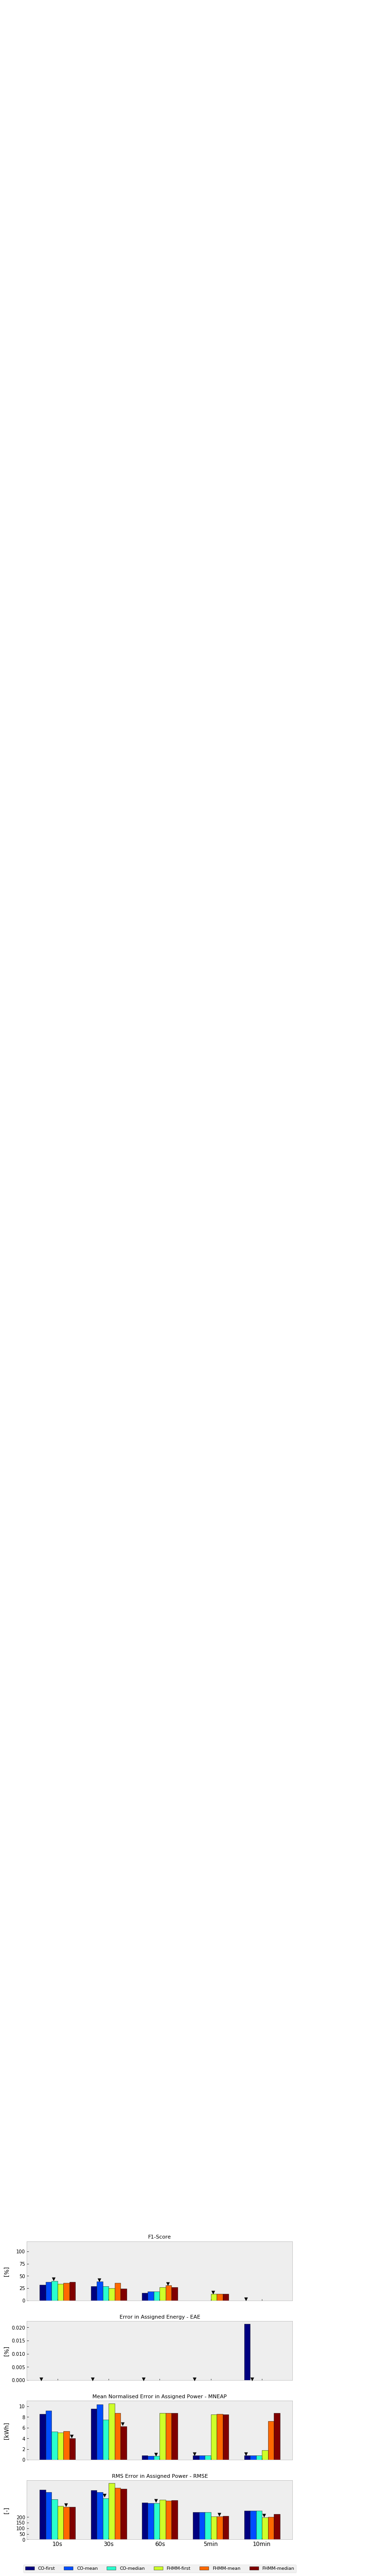

In [126]:
rcParams['figure.figsize'] = (10, 11.5)
fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0.35})
cols=['F1','EAE','MNEAP','RMSE']
ylabels=['[%]','[%]','[kWh]','[-]','[W]']
per=['10s','30s','60s','5min','10min']

labels={'CO-first':-0.35, 'CO-mean':-0.22, 'CO-median':-0.11, 'FHMM-first':0.01, 'FHMM-mean':0.13 ,'FHMM-median':0.245}

c=0
for ax in fig.get_axes():      
    m_mean[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, cmap="jet")
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    x = 0
    for p in per:
        ax.annotate("▼", xy=(labels[maxs_i[p][cols[c]]]+x, maxs[p][cols[c]]+maxs[p][cols[c]]*0.03))
        x+=1
    c+=1
    
ax5.set_xticklabels(labels=per, rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax2,ax3,ax4,ax5)])
ax2.set(ylim=(0,120))
ax2.set_yticks([0,25,50,75,100])

ax5.set_yticks([0,50,100,150,200])

ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels.keys(), loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.6),fontsize=9.5)


#ax2.annotate("90.5%", xy=(0.68, 98)); #30s FHMM-mean
#ax3.annotate("0.19", xy=(6.22, 1.4)); #30s FHMM-median
ax3.annotate("kWh", xy=(6.22, 0.9)); #30s FHMM-median
#ax4.annotate("0.24", xy=(6.22, 0.7)); #30s FHMM-median
#ax5.annotate("41.5", xy=(6.22, 120)); #30s FHMM-median
ax5.annotate("   W", xy=(6.22, 90)); #30s FHMM-median


plt.savefig('./data/images/5.7_All_metrics.svg', bbox_inches='tight', transparent=True)

pass

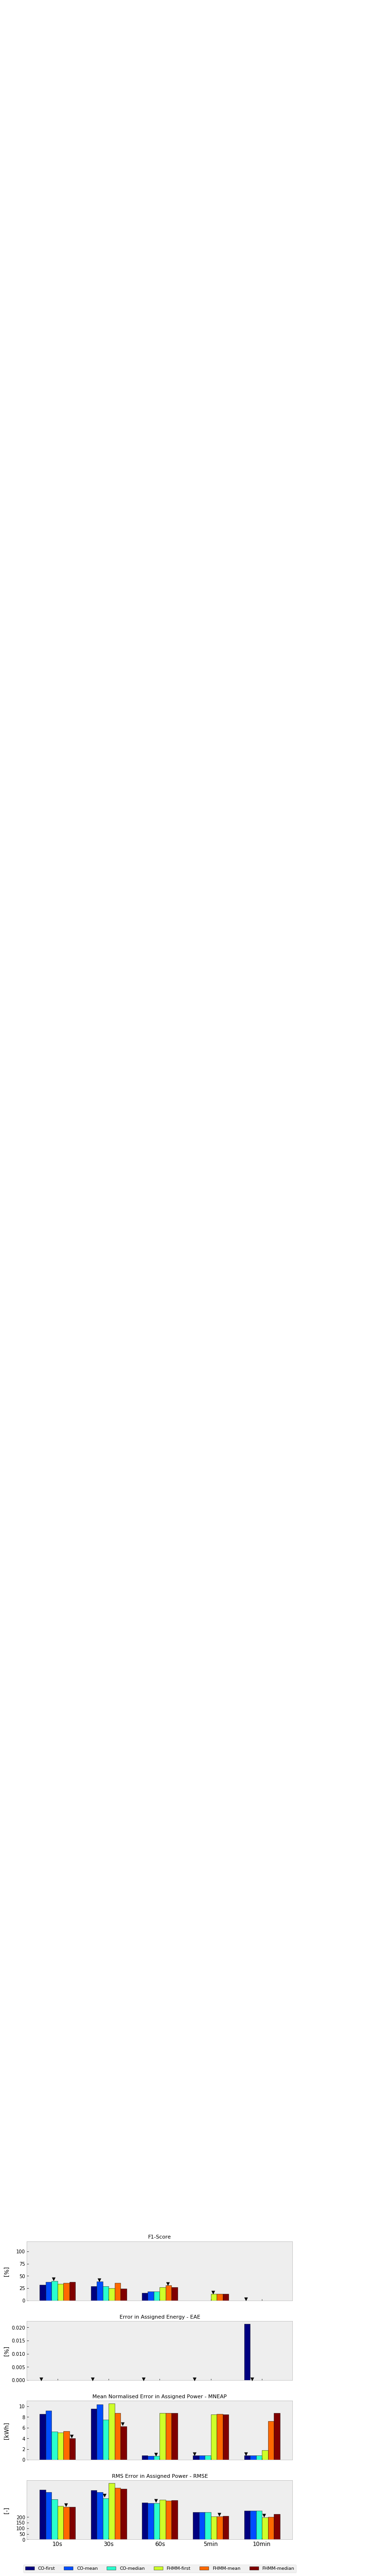

In [127]:
rcParams['figure.figsize'] = (10, 11.5)
fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=True, gridspec_kw={'hspace': 0.35})
cols=['F1','EAE','MNEAP','RMSE']
ylabels=['[%]','[%]','[kWh]','[-]','[W]']
per=['10s','30s','60s','5min','10min']

labels={'CO-first':-0.35, 'CO-mean':-0.22, 'CO-median':-0.11, 'FHMM-first':0.01, 'FHMM-mean':0.13 ,'FHMM-median':0.245}

c=0
for ax in fig.get_axes():      
    m_mean[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, cmap="jet")
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    x = 0
    for p in per:
        ax.annotate("▼", xy=(labels[maxs_i[p][cols[c]]]+x, maxs[p][cols[c]]+maxs[p][cols[c]]*0.03))
        x+=1
    c+=1
    
ax5.set_xticklabels(labels=per, rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax2,ax3,ax4,ax5)])
ax2.set(ylim=(0,120))
ax2.set_yticks([0,25,50,75,100])

ax5.set_yticks([0,50,100,150,200])

ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels.keys(), loc='lower center', ncol=6, bbox_to_anchor=(0.5, -0.6),fontsize=9.5)


#ax2.annotate("90.5%", xy=(0.68, 98)); #30s FHMM-mean
#ax3.annotate("0.19", xy=(6.22, 1.4)); #30s FHMM-median
ax3.annotate("kWh", xy=(6.22, 0.9)); #30s FHMM-median
#ax4.annotate("0.24", xy=(6.22, 0.7)); #30s FHMM-median
#ax5.annotate("41.5", xy=(6.22, 120)); #30s FHMM-median
ax5.annotate("   W", xy=(6.22, 90)); #30s FHMM-median


plt.savefig('./data/images/5.7_All_metrics.svg', bbox_inches='tight', transparent=True)

pass

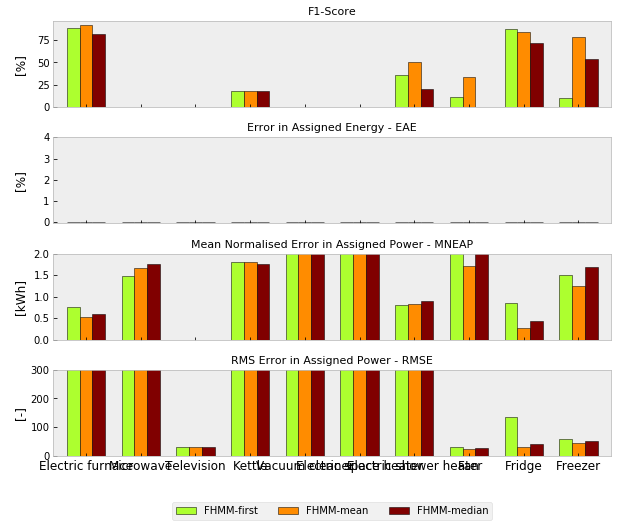

In [128]:
rcParams['figure.figsize'] = (10, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})

#cols=['FEAC','F1','EAE','MNEAP','RMSE']
cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']
labels=['FHMM-first', 'FHMM-mean' ,'FHMM-median']
c=0

for ax in fig.get_axes():
    
    df=pd.DataFrame([m['30s'][1][cols[c]],m['30s'][3][cols[c]],m['30s'][5][cols[c]]]).transpose()
    #if ax==ax1:
    #    df['FEAC'].mean().plot.barh(ax=ax1, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    #else:
    #     df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
 
    df.plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False,   color=['greenyellow','darkorange','maroon'])
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1   
    

ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})
fig.align_ylabels([(ax1,ax2,ax3,ax4,ax5)])
ax3.set_yticks([0,1,2,3,4])
ax4.set(ylim=(0,1.8))
ax4.set_yticks([0,0.5,1,1.5,2])
ax5.set(ylim=(0,270))
ax5.set_yticks([0,100,200,300])
ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')
lgd = ax5.legend(labels, loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.8))


plt.savefig('./data/images/5.8_All_metrics_2.svg', bbox_inches='tight', transparent=True)

pass

In [129]:
print('FHMM-first')
print(m['10s'][1])
print('\nFHMM-mean')
print(m['10s'][3])
print('\nFHMM-median')
print(m['10s'][5])

FHMM-first
                               F1  EAE      MNEAP        RMSE
Electric furnace         9.756098  0.0   0.958680  718.855302
Microwave               95.081967  0.0   0.084457  200.045288
Television               0.000000  0.0  -1.105734   32.274283
Kettle                  28.571429  0.0   0.631335  462.466720
Vacuum cleaner           0.000000  0.0   0.629081    9.216708
Electric space heater    0.000000  0.0  44.666508  866.340674
Electric shower heater  81.632653  0.0   0.326712  573.045068
Fan                     18.181818  0.0   1.994561   27.060486
Fridge                  46.575342  0.0   0.672064   53.044658
Freezer                 56.338028  0.0   1.696312   68.524628

FHMM-mean
                               F1  EAE      MNEAP        RMSE
Electric furnace        18.604651  0.0   0.952538  711.411247
Microwave               90.625000  0.0   0.114312  211.940847
Television               0.000000  0.0  -1.105734   32.274283
Kettle                  63.157895  0.0   0.39923

### Resultados del mejor modelo
En vista de los resultados del obtenidos, se propone la elección del modelo FHMM entrenado con datos promedio de dispositivos cada 30 segundos. Este modelo solo se considera adecuado para la desagregación de datos promedio de potencia activa medidos en cabecera cada 30 segundos.

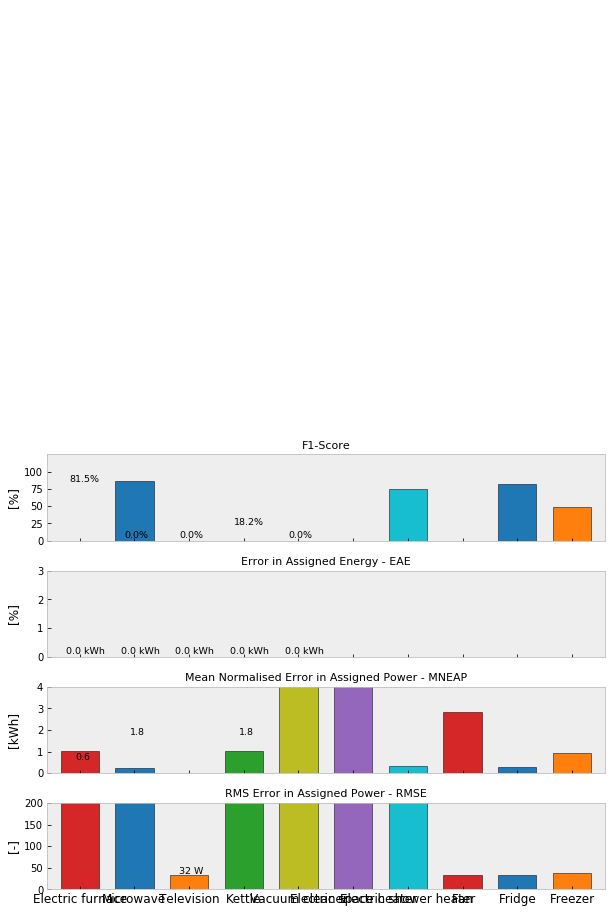

In [130]:
rcParams['figure.figsize'] = (10, 8)

fig, (ax2,ax3,ax4,ax5) = plt.subplots(4, 1, sharex=False, gridspec_kw={'hspace': 0.35})
#cols=['FEAC','F1','EAE','MNEAP','RMSE']

cols=['F1','EAE','MNEAP','RMSE']

ylabels=['[%]','[%]','[kWh]','[-]','[W]']
colors=['tab:red','tab:blue','tab:orange','tab:green','tab:olive','tab:purple','tab:cyan']
c=0

for ax in fig.get_axes():
    df=pd.DataFrame(m['30s'][4][cols[c]])
    df[cols[c]].plot.bar(ax=ax, width=0.7, edgecolor='black', linewidth=0.5, legend=False, color=colors)
    ax.set(ylabel=ylabels[c])
    ax.grid(b=None)
    c+=1


ax2.set_xticklabels('')
ax3.set_xticklabels('')
ax4.set_xticklabels('')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=0, fontdict={'fontsize':12})

fig.align_ylabels([(ax2,ax3,ax4,ax5)])

ax2.set(ylim=(0,125))
ax3.set(ylim=(0,1))
ax4.set(ylim=(0,0.7))
ax5.set(ylim=(0,110))

ax2.set_yticks([0,25,50,75,100])
ax3.set_yticks([0,1,2,3])
ax4.set_yticks([0,1,2,3,4])
ax5.set_yticks([0,50,100,150,200])


ax2.set_title('F1-Score', fontsize=11, loc='center')
ax3.set_title('Error in Assigned Energy - EAE', fontsize=11, loc='center')
ax4.set_title('Mean Normalised Error in Assigned Power - MNEAP', fontsize=11, loc='center')
ax5.set_title('RMS Error in Assigned Power - RMSE', fontsize=11, loc='center')

df=pd.DataFrame(m['30s'][5])

for x in range(5):ax2.annotate(str(round(df['F1'][x],1))+'%', xy=(x-0.18 , df['F1'][x]+4),fontsize=9.5)
for x in range(5):ax3.annotate(str(round(df['EAE'][x],1))+' kWh', xy=(x-0.25 , df['EAE'][x]+0.1),fontsize=9.5)
for x in range(5):ax4.annotate(str(round(df['MNEAP'][x],1)), xy=(x-0.08 , df['MNEAP'][x]+0.03),fontsize=9.5)
for x in range(5):ax5.annotate(str(round(df['RMSE'][x]))+' W', xy=(x-0.18 , df['RMSE'][x]+5),fontsize=9.5)

plt.savefig('./data/images/5.9_Metrics_FHMM_30seg_median.svg', bbox_inches='tight', transparent=True)

In [131]:
valid_Devices.total_energy()

Calculating total_energy for ElecMeterID(instance=11, building=1, dataset='DSUAL') ...   

apparent    0.358029
reactive    0.032105
active      0.347819
dtype: float64

In [132]:
valid_Devices.energy_per_meter()

10/10 ElecMeter(instance=11, building=1, dataset='DSUAL', appliances=[Appliance(type='freezer', instance=1)])instance=1)])

,"(2, 1, DSUAL)","(3, 1, DSUAL)","(4, 1, DSUAL)","(5, 1, DSUAL)","(6, 1, DSUAL)","(7, 1, DSUAL)","(8, 1, DSUAL)","(9, 1, DSUAL)","(10, 1, DSUAL)","(11, 1, DSUAL)"
active,0.061515,0.102999,0.000203,0.038643,0.001728,0.001105,0.124002,0.001775,0.010934,0.004915
apparent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reactive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Replicando el entrenamiento del modelo

In [133]:
from nilmtk import DataSet
from nilmtk.legacy.disaggregate import FHMM


train = DataSet('dsual.h5')

train.set_window(start="2022-11-07 10:25:00", end="2022-11-07 12:37:00")
train_elec=train.buildings[1].elec 

#dispositivos a entrenar: [Lights_1, Lights_2, HVAC_1, HVAC_2, HVAC_4, Rack]
train_Devices=train_elec.select(instance=[2,3,4,5,6,7,8,9,10,11])

#opcional: asignación manual de estados de dispositivos
#num_states={train_Devices[2]:2, train_Devices[3]:3, train_Devices[4]:4,
#            train_Devices[5]:5, train_Devices[6]:6}

#entrenamiento y exportación del modelo
FHMM_30s_median=FHMM()
FHMM_30s_median.MIN_CHUNK_LENGTH=1
FHMM_30s_median.train(train_Devices,
                        num_states_dict={}, #en otro caso: { }
                        ac_type='active',
                        sample_period=1800,
                        resample_kwargs={'how':'median'})


#falla aqui al exportar el modelo
#FHMM_30s_median.export_model('./data/FHMM_30s_median_model.pickle') 
#output=HDFDataStore(data_dir+'NILM/Results/'+model_name+'_'+sp_name+'_'+method+'_pred.h5', 'w')


print('\n\nDone!')


Training model for submeter 'ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])' with 1 states
Training model for submeter 'ElecMeter(instance=8, building=1, dataset='DSUAL', appl

In [134]:
from nilmtk.legacy.disaggregate import FHMM
FHMM=FHMM()
#FHMM.import_model('C:/data/FHMM_30s_median_model.pickle') 
print('Oven: '+str(FHMM_30s_median.individual[valid_Devices[2]].means_))
print('Microwave: '+str(FHMM_30s_median.individual[valid_Devices[3]].means_))
print('Television: '+str(FHMM_30s_median.individual[valid_Devices[4]].means_))
print('Kettle: '+str(FHMM_30s_median.individual[valid_Devices[5]].means_))
print('Vacuum Cleaner: '+str(FHMM_30s_median.individual[valid_Devices[6]].means_))

print('electric space heater: '+str(FHMM_30s_median.individual[valid_Devices[7]].means_))
print('electric shower heater: '+str(FHMM_30s_median.individual[valid_Devices[8]].means_))
print('Fan: '+str(FHMM_30s_median.individual[valid_Devices[9]].means_))
print('Fridge: '+str(FHMM_30s_median.individual[valid_Devices[10]].means_))
print('Freezer: '+str(FHMM_30s_median.individual[valid_Devices[11]].means_))


Oven: [[666.6199468]]
Microwave: [[208.97809462]]
Television: [[-6.85422845]]
Kettle: [[6.66229065]]
Vacuum Cleaner: [[128.32020748]]
electric space heater: [[6.78550262]]
electric shower heater: [[979.7506822]]
Fan: [[21.55875301]]
Fridge: [[50.91486613]]
Freezer: [[34.05862379]]


In [135]:
FHMM_30s_median.model

GaussianHMM(covariance_type='full')

In [136]:
FHMM_30s_median.individual

OrderedDict([(ElecMeter(instance=2, building=1, dataset='DSUAL', appliances=[Appliance(type='electric furnace', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=3, building=1, dataset='DSUAL', appliances=[Appliance(type='microwave', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=4, building=1, dataset='DSUAL', appliances=[Appliance(type='television', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=5, building=1, dataset='DSUAL', appliances=[Appliance(type='kettle', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=6, building=1, dataset='DSUAL', appliances=[Appliance(type='vacuum cleaner', instance=1)]),
              GaussianHMM(covariance_type='full')),
             (ElecMeter(instance=7, building=1, dataset='DSUAL', appliances=[Appliance(type='electric space heater', instance=1)])